# Predicting CLTV & Repeat Customers on Shopify Platform with Machine Learning.

<div>
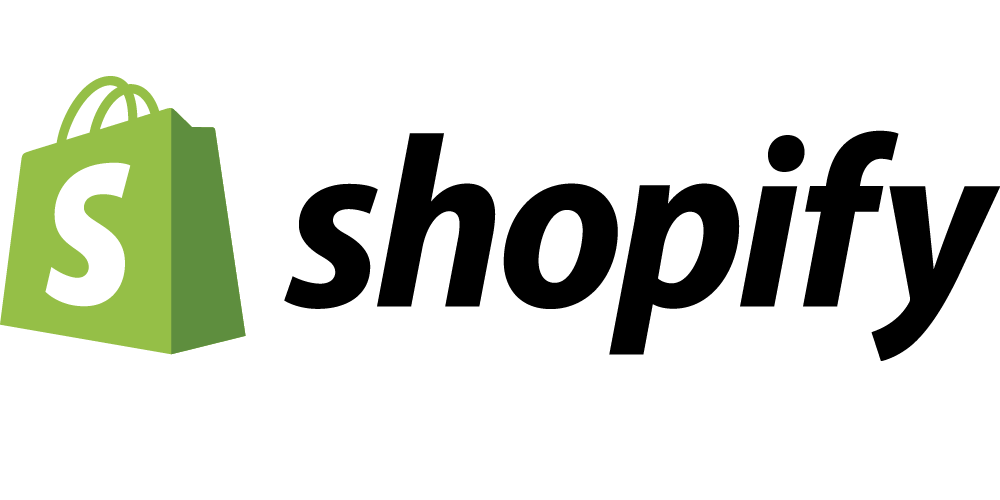
</div>

###  TABLE OF CONTENTS: 

<br> **I. INTRODUCTION**  
- 1. Project Purpose.
- 2. Loading our data.
- 3. Previewing our data

<br> **II. DATA WRANGLING**  
- 1. Cleaning up and fixing issues. 
- 2. Creating 3 separate dataframes. 

<br> **III. EXPLORATORY DATA ANALYSIS**  
- 1.
- 2.

<br> **IV. PREPROCESSING AND TRAINING DATA** 
- 1.
- 2.

<br> **V. MODELLING**  
- 1.
- 2.

<br> **VI. CONCLUSIONS** 
- 1.
- 2. 

# I. Introduction: 

### 1. Project Purpose.

<p> Welcome to this Tutorial on Extracting Shopify Data to create a Customer Lifetime Value (CLTV) Analysis! This notebook will walk you through the steps so you too can replicate this for your business! 

<p> As of 2021, e-commerce is, worldwide, a $4.89 trillion industry. One of the leading platforms in the marketplace is Shopify which currently holds a 23% market share in the United States with over 2.6 million live stores. For Perspective, there is about 1 store for every 130 Americans. With e-commerce expected to keep growing in the future, it is important for current and future Shopify store-owners to get the most use  of the available data the platform provides.
This project will apply the Data Science method to learn more about customer behavior  and create a Customer Lifetime Value Analysis (CLTV) with some Machine Learning techniques from Shopify Data. The purpose will be to understand what makes customers become repeat customers and use the information collected to generate more revenue by increasing LTV. 

<p> Shopify data is usually standardized when exporting orders in csv format. In this dataset, the original raw export is  organized where each row represents an item sold with ~73 columns that provide information on the item purchased. Most of these will not be useful for this analysis and dropped early on. 

<br> **Featured columns include:**

- *Name*: This refers to the Order Id. This is not unique, as there can be multiple items in one order. 
- *Email*: This is the email of the customer, which is used to identify a customer. 
- *Paid at*: This column refers to the time and date the transaction occurred. There is only one date for each Order, so it is normal if there are blanks provided. Other columns follow this logic 
- *Subtotal*: This refers to the subtotal for each order.  
- *Lineitem name*: This refers to the name of the product. Typically, a store sets up the product name where we can get information such as the size, type and color of the product in question. This column should never be empty. 
- *Line Item Quantity and Line Item Price*: These columns design how much of each item and their price, respectively, and shouldn’t contain missing values. 

How a shopify store is organized to collect data may result in possible missing values or incomplete transactions(as was the case for this company). The analysis will clean some data but assumes that there are no missing values in the “Created at”,  “Lineitem name”, and “LineItem Price” columns since all of these refer to each individual item sold and if there is missing data in these, they will need to be dropped. For a more detailed guide on understanding shopify data and more details on the columns, please refer to this sheet.
The data used for this analysis comes from a real company which generated $1 million in YTD revenue. The data has been modified from its original version to protect the anonymity of the company as well as the information of all its customers. 

<br> The original export file which will be analyzing  has been modified with the following alterations: 

- Columns *“Billing Name “ , “ Billing Street“ , “Billing Address1 “ , “Billing Address2 “ , “Billing Company “ , “Billing Phone “ , “Shipping Name “ , “ Shipping Street“ , “Shipping Address1 “ , “Shipping Address2 “ , “Shipping Company “ , “Shipping Phone “*  have all been replaced with null values. These columns will not be used in the analysis and dropped early on shortly after the introduction .
- Values in the *“Email”* column have been replaced with a unique Email Id for each customer instead of their actual emails. 
- Column *“Line-item name”* has substituted product names. 

 


### 2. Loading our packages and Dataframe. 

In [1]:
## We start by importing the appropriate packages which we will want to use. 
import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt
from datetime import timedelta
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
## We create our dataframe with the raw data.
raw_data = pd.read_csv('.\CLEANED_data.csv')

C:\Users\benja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\interactiveshell.py:3172: DtypeWarning: Columns (20,44,46) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### 3. Previewing our data.

In [3]:
# We preview the first 5 rows of our dataframe.
raw_data.head()

,Name,Email,Financial Status,Paid at,Fulfillment Status,Fulfilled at,Accepts Marketing,Currency,Subtotal,Shipping,Taxes,Total,Discount Code,Discount Amount,Shipping Method,Created at,Lineitem quantity,Lineitem name,Lineitem price,Lineitem compare at price,Lineitem sku,Lineitem requires shipping,Lineitem taxable,Lineitem fulfillment status,Billing Name,Billing Street,Billing Address1,Billing Address2,Billing Company,Billing City,Billing Zip,Billing Province,Billing Country,Billing Phone,Shipping Name,Shipping Street,Shipping Address1,Shipping Address2,Shipping Company,Shipping City,Shipping Zip,Shipping Province,Shipping Country,Shipping Phone,Notes,Note Attributes,Cancelled at,Payment Method,Payment Reference,Refunded Amount,Vendor,Id,Tags,Risk Level,Source,Lineitem discount,Tax 1 Name,Tax 1 Value,Tax 2 Name,Tax 2 Value,Tax 3 Name,Tax 3 Value,Tax 4 Name,Tax 4 Value,Tax 5 Name,Tax 5 Value,Phone,Receipt Number,Duties,Billing Province Name,Shipping Province Name,Payment Terms Name,Next Payment Due At
0,#29489,Anonymous4245,paid,11/11/2021 16:53,unfulfilled,NaN,no,USD,142.0,0.00,11.72,153.72,NaN,0.0,Free Shipping,11/11/2021 16:53,1,Mint Crossback Sports Bra - S,38.0,NaN,100.0,True,True,pending,NaN,NaN,NaN,NaN,NaN,DIXON,'61021,IL,US,NaN,NaN,NaN,NaN,NaN,NaN,DIXON,'61021,IL,US,NaN,NaN,NaN,NaN,Shopify Payments,c29208367530214.1,0.0,NaN,4.550000e+12,NaN,Low,web,0.0,Dixon City Tax 0.5%,0.71,Illinois State Tax 6.25%,8.88,Lee County Tax 1.5%,2.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Illinois,Illinois,NaN,NaN
1,#29489,Anonymous4245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11/11/2021 16:53,1,Black/Burgundy Contour Leggings - XS,52.0,NaN,300.0,True,True,pending,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,#29489,Anonymous4245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11/11/2021 16:53,1,Black/Mint Contour Leggings - XS,52.0,NaN,100.0,True,True,pending,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,#29488,Anonymous9987,paid,11/11/2021 10:09,unfulfilled,NaN,no,USD,40.0,5.36,2.90,48.26,NaN,0.0,Standard Shipping,11/11/2021 10:09,1,Black Long Sleeve Top - L,40.0,NaN,102.0,True,True,pending,NaN,NaN,NaN,NaN,NaN,Moreno Valley,'92553,CA,US,NaN,NaN,NaN,NaN,NaN,NaN,Moreno Valley,'92553,CA,US,NaN,NaN,NaN,NaN,Afterpay North America,c29207688708326.1,0.0,NaN,4.550000e+12,NaN,Low,web,0.0,California State Tax 7.25%,2.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,California,California,NaN,NaN
4,#29487,Anonymous9675,paid,11/10/2021 14:54,fulfilled,11/11/2021 10:56,no,USD,94.0,5.06,0.00,99.06,NaN,0.0,Standard Shipping,11/10/2021 14:54,1,Raspberry Crossover Sports Bra - XL,38.0,NaN,53.0,True,True,fulfilled,NaN,NaN,NaN,NaN,NaN,ELKINS PARK,19027-1829,PA,US,NaN,NaN,NaN,NaN,NaN,NaN,ELKINS PARK,19027-1829,PA,US,NaN,NaN,NaN,NaN,Shopify Payments,c29206160441574.1,0.0,NaN,4.550000e+12,NaN,Low,web,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pennsylvania,Pennsylvania,NaN,NaN


In [4]:
# We now look at the columns to get more information about them. 
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50418 entries, 0 to 50417
Data columns (total 73 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Name                         50418 non-null  object 
 1   Email                        46372 non-null  object 
 2   Financial Status             28489 non-null  object 
 3   Paid at                      27735 non-null  object 
 4   Fulfillment Status           28489 non-null  object 
 5   Fulfilled at                 27256 non-null  object 
 6   Accepts Marketing            28489 non-null  object 
 7   Currency                     28489 non-null  object 
 8   Subtotal                     28489 non-null  float64
 9   Shipping                     28489 non-null  float64
 10  Taxes                        28489 non-null  float64
 11  Total                        28489 non-null  float64
 12  Discount Code                7339 non-null   object 
 13  Discount Amount 

# II. Data Wrangling: 

## 1. Cleaning our Data.  

### Step 1: Removing redundant and uncessary columns 

As mentionned in the introduction, certain columns are unessary in this analysis, thus we can remove them.

In [5]:
## We create a list of columns to drop and use the drop data to remove them from our dataframe.
columns_to_drop = ['Fulfilled at','Currency','Created at','Lineitem compare at price','Lineitem requires shipping','Lineitem taxable','Lineitem fulfillment status','Billing Name','Billing Street','Billing Address1','Billing Address2','Billing Company','Billing Phone','Shipping Name','Shipping Street','Shipping Address1','Shipping Address2','Shipping Company','Shipping City','Shipping Zip','Shipping Province','Shipping Country','Shipping Phone','Notes','Note Attributes','Payment Reference','Vendor','Id','Tags','Risk Level','Source','Tax 1 Name','Tax 1 Value','Tax 2 Name','Tax 2 Value','Tax 3 Name','Tax 3 Value','Tax 4 Name','Tax 4 Value','Tax 5 Name','Tax 5 Value','Phone','Receipt Number','Duties','Billing Province Name','Shipping Province Name','Payment Terms Name','Next Payment Due At','Lineitem sku']
raw_data.drop(columns=columns_to_drop, inplace = True)
raw_data.head(3)

,Name,Email,Financial Status,Paid at,Fulfillment Status,Accepts Marketing,Subtotal,Shipping,Taxes,Total,Discount Code,Discount Amount,Shipping Method,Lineitem quantity,Lineitem name,Lineitem price,Billing City,Billing Zip,Billing Province,Billing Country,Cancelled at,Payment Method,Refunded Amount,Lineitem discount
0,#29489,Anonymous4245,paid,11/11/2021 16:53,unfulfilled,no,142.0,0.0,11.72,153.72,NaN,0.0,Free Shipping,1,Mint Crossback Sports Bra - S,38.0,DIXON,'61021,IL,US,NaN,Shopify Payments,0.0,0.0
1,#29489,Anonymous4245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Black/Burgundy Contour Leggings - XS,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,#29489,Anonymous4245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Black/Mint Contour Leggings - XS,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


### Step 2: Renaming Columns
Some columns would need more appropriate / relevant names.

In [6]:
## We use the rename method to change the column names. 
raw_data = raw_data.rename(columns={'Name': 'OrderID','Paid at': 'Transaction Date','Email':'CustomerID'} )
raw_data.head(3)

,OrderID,CustomerID,Financial Status,Transaction Date,Fulfillment Status,Accepts Marketing,Subtotal,Shipping,Taxes,Total,Discount Code,Discount Amount,Shipping Method,Lineitem quantity,Lineitem name,Lineitem price,Billing City,Billing Zip,Billing Province,Billing Country,Cancelled at,Payment Method,Refunded Amount,Lineitem discount
0,#29489,Anonymous4245,paid,11/11/2021 16:53,unfulfilled,no,142.0,0.0,11.72,153.72,NaN,0.0,Free Shipping,1,Mint Crossback Sports Bra - S,38.0,DIXON,'61021,IL,US,NaN,Shopify Payments,0.0,0.0
1,#29489,Anonymous4245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Black/Burgundy Contour Leggings - XS,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,#29489,Anonymous4245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Black/Mint Contour Leggings - XS,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


### Step 3: Cleaning up NaN values. 
Many values in this dataset appear as NaN. This is because: 

 - Some columns will ...
 - Some columns will ...

In [7]:
# We use the fillna method to fill "NaN" values with either empty strings or 0s to clean our data.
raw_data['Discount Code'] = raw_data['Discount Code'].fillna('')
raw_data['Discount Amount'] = raw_data['Discount Amount'].fillna(0)
raw_data.head(3)

,OrderID,CustomerID,Financial Status,Transaction Date,Fulfillment Status,Accepts Marketing,Subtotal,Shipping,Taxes,Total,Discount Code,Discount Amount,Shipping Method,Lineitem quantity,Lineitem name,Lineitem price,Billing City,Billing Zip,Billing Province,Billing Country,Cancelled at,Payment Method,Refunded Amount,Lineitem discount
0,#29489,Anonymous4245,paid,11/11/2021 16:53,unfulfilled,no,142.0,0.0,11.72,153.72,,0.0,Free Shipping,1,Mint Crossback Sports Bra - S,38.0,DIXON,'61021,IL,US,NaN,Shopify Payments,0.0,0.0
1,#29489,Anonymous4245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0.0,NaN,1,Black/Burgundy Contour Leggings - XS,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,#29489,Anonymous4245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0.0,NaN,1,Black/Mint Contour Leggings - XS,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


### Step 4: Removing data for which we do not have emails: 
As mentionned in our introduction, while setting up our shopify data collection, some emails failed to be collected. We must remove the transactions for which we have missing emails as we do not know if the customer was repeat or not.

In [8]:
## Using dropna, we remove the rows for which no email is associated with the transaction. 
raw_data.dropna(subset=['CustomerID'], inplace = True)
raw_data.head(3)

,OrderID,CustomerID,Financial Status,Transaction Date,Fulfillment Status,Accepts Marketing,Subtotal,Shipping,Taxes,Total,Discount Code,Discount Amount,Shipping Method,Lineitem quantity,Lineitem name,Lineitem price,Billing City,Billing Zip,Billing Province,Billing Country,Cancelled at,Payment Method,Refunded Amount,Lineitem discount
0,#29489,Anonymous4245,paid,11/11/2021 16:53,unfulfilled,no,142.0,0.0,11.72,153.72,,0.0,Free Shipping,1,Mint Crossback Sports Bra - S,38.0,DIXON,'61021,IL,US,NaN,Shopify Payments,0.0,0.0
1,#29489,Anonymous4245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0.0,NaN,1,Black/Burgundy Contour Leggings - XS,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,#29489,Anonymous4245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0.0,NaN,1,Black/Mint Contour Leggings - XS,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


### Step 5: Converting Transaction Date to Datetime.
Our Transaction Date column needs to be converted to a Datetime object.

In [9]:
## We use pd.to_datetime to convert the 'Transaction Date' column to datetime object.  
raw_data['Transaction Date'] = pd.to_datetime(raw_data['Transaction Date'], errors='coerce')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46372 entries, 0 to 50416
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   OrderID             46372 non-null  object        
 1   CustomerID          46372 non-null  object        
 2   Financial Status    25909 non-null  object        
 3   Transaction Date    25188 non-null  datetime64[ns]
 4   Fulfillment Status  25909 non-null  object        
 5   Accepts Marketing   25909 non-null  object        
 6   Subtotal            25909 non-null  float64       
 7   Shipping            25909 non-null  float64       
 8   Taxes               25909 non-null  float64       
 9   Total               25909 non-null  float64       
 10  Discount Code       46372 non-null  object        
 11  Discount Amount     46372 non-null  float64       
 12  Shipping Method     25383 non-null  object        
 13  Lineitem quantity   46372 non-null  int64     

## 2. Creating Seperate Dataframes. 

Now that we have cleaned our data, we will want to create three seperate dataframes. 
- Customers: 
- Orders: 
- Items: 

In [10]:
## Let's see how many unique values will be in each dataframe. 
print('The number of unique orders in this dataset is: ' + str(raw_data['OrderID'].nunique()))
print('The number of unique customers in this dataset is: ' + str(raw_data['CustomerID'].nunique()))
print('The number of unique items sold in this dataset is: ' +str(raw_data['Lineitem name'].nunique()))

The number of unique orders in this dataset is: 25909
The number of unique customers in this dataset is: 16472
The number of unique items sold in this dataset is: 566


### Creating a unique customers dataframe.
This dataframe will re-organize our data so that each unique customer has its own row. As we are working on analyzing the CLTV ratio of our customers, we will need to get information about each of the customers. 

In [11]:
## Prior to creating our dataframe, we define functions which we will be used to retrieve infromation we want below. 
def count_discount_codes(discount_codes):
    '''
    This function returns the number of distinct coupons used 
    '''
    counter = 0
    for entry in discount_codes:
        if entry != '':
            counter += 1
    return counter

def time_elapsed(x):
    '''
    This function returns the number of days between a customer's first order and most recent order.
    '''
    return (x.max() - x.min()).days

def order_freq(x):
    '''
    This function returns the how often a customer makes a purchase (in days)
    '''
    return (x.max() - x.min()).days / x.count()

def repeat_customer(x):
    '''
    This function return whether or not the customer is a repeat customer. 
    '''
    if x.max() != x.min():
        return 1
    else:
        return 0

In [12]:
## We create the customer dataframe. 
customer =  raw_data.groupby(['CustomerID']).agg(Number_of_Orders = ('OrderID', 'nunique'),
                                            Total_Items_Purchased = ('Lineitem quantity', np.sum),
                                            Total_Spent = ('Subtotal', np.sum),
                                            Smallest_purchase = ('Subtotal', min),
                                            Largest_purchase = ('Subtotal', max),
                                            Average_order_spend = ('Subtotal', np.mean),
                                            Coupons_Used = ('Discount Code', count_discount_codes),                         
                                            First_Order = ('Transaction Date', np.min), 
                                            Most_Recent_Order = ('Transaction Date', np.max),
                                            Time_Elapsed_days = ('Transaction Date', time_elapsed),
                                            Frequency_in_days =('Transaction Date', order_freq),
                                            repeat_customer2 =('Transaction Date', repeat_customer)
                                            )

# We sort the values to get the customers who placed the most orders first. 
customer.sort_values('Number_of_Orders', ascending = False, inplace=True)

# We create a repeat customer column, 1 indicates they made > 1 order and 0 indicates 1 order.
customer['repeat_customer'] = np.where(customer['First_Order'] != customer['Most_Recent_Order'],1,0)

## We drop rows for which we don't have data and preview our customer table. 
customer.dropna(inplace=True)
customer.reset_index(inplace=True)
customer.head()

,CustomerID,Number_of_Orders,Total_Items_Purchased,Total_Spent,Smallest_purchase,Largest_purchase,Average_order_spend,Coupons_Used,First_Order,Most_Recent_Order,Time_Elapsed_days,Frequency_in_days,repeat_customer2,repeat_customer
0,Anonymous13455,36,42,1480.60,12.5,122.40,41.127778,14,2020-06-30 17:54:00,2021-10-15 16:10:00,471.0,13.083333,1,1
1,Anonymous2142,23,37,1244.90,0.0,126.00,54.126087,11,2019-05-09 15:48:00,2021-08-10 09:57:00,823.0,39.190476,1,1
2,Anonymous4843,22,56,2259.05,48.0,156.75,102.684091,3,2019-10-14 22:08:00,2021-10-15 16:59:00,731.0,36.550000,1,1
3,Anonymous11225,21,27,1022.85,16.0,140.00,48.707143,5,2020-01-31 17:54:00,2021-05-25 13:46:00,479.0,23.950000,1,1
4,Anonymous540,20,43,1534.10,22.0,176.00,76.705000,15,2020-01-03 16:21:00,2021-08-09 09:02:00,583.0,30.684211,1,1


In [13]:
## We check for the repeat for the number of customers.
customer['repeat_customer'].value_counts()

0    11624
1     4556
Name: repeat_customer, dtype: int64

At a glance, it appears that repeat customers represent ~**28%** of our clientele.

In [14]:
## We can use this to check if a customer is repeat or not
customer.query("CustomerID == 'Anonymous5678'")

,CustomerID,Number_of_Orders,Total_Items_Purchased,Total_Spent,Smallest_purchase,Largest_purchase,Average_order_spend,Coupons_Used,First_Order,Most_Recent_Order,Time_Elapsed_days,Frequency_in_days,repeat_customer2,repeat_customer
3761,Anonymous5678,2,3,140.0,40.0,100.0,70.0,0,2021-03-11 18:01:00,2021-03-19 17:58:00,7.0,3.5,1,1


### Creating a unique order dataframe.

In [15]:
# We create the orders dataframe. 
orders =  raw_data.groupby(['OrderID']).agg(Total_Spent = ('Subtotal', np.sum),
                                            Total_Items_Purchased = ('Lineitem quantity', np.sum),
                                            CustomerID = ('CustomerID', np.max),
                                            Transaction_Date = ('Transaction Date', np.max)
                                            )

orders.reset_index(inplace= True)

## We remove the '#' from OrdersID and change it to int type. 
orders['OrderID'] = orders['OrderID'].apply(lambda x: x.replace('#','')).astype(int)

## We sort by OrderID, and preview the dataframe. 
orders = orders.sort_values('OrderID', ascending = False)
orders.dropna(inplace=True)
orders.head(3)

,OrderID,Total_Spent,Total_Items_Purchased,CustomerID,Transaction_Date
20610,29489,142.0,3,Anonymous4245,2021-11-11 16:53:00
20609,29488,40.0,1,Anonymous9987,2021-11-11 10:09:00
20608,29487,94.0,2,Anonymous9675,2021-11-10 14:54:00


In [16]:
## We add a column to identify the customers who made a repeat purchase.
duplicated_orders = list(orders.CustomerID[orders.CustomerID.duplicated()])
orders['repeat_customer'] = np.where(orders['CustomerID'].apply(lambda x: x in duplicated_orders),1,0)
orders.head(3)

,OrderID,Total_Spent,Total_Items_Purchased,CustomerID,Transaction_Date,repeat_customer
20610,29489,142.0,3,Anonymous4245,2021-11-11 16:53:00,1
20609,29488,40.0,1,Anonymous9987,2021-11-11 10:09:00,1
20608,29487,94.0,2,Anonymous9675,2021-11-10 14:54:00,0


In [17]:
## We can check how many orders came from repeat customers as opposed to one-time customers. 
orders['repeat_customer'].value_counts()

1    13565
0    11623
Name: repeat_customer, dtype: int64

It appears that repeat more than half of orders (**52%**) are made by repeat customers. This is a reason to engage with them more and to make more of them. 

In [18]:
## We can take a look at a customer who made several orders. 
orders.query("CustomerID == 'Anonymous4572'")

,OrderID,Total_Spent,Total_Items_Purchased,CustomerID,Transaction_Date,repeat_customer
18881,27884,45.5,2,Anonymous4572,2021-06-23 13:29:00,1
20809,3224,36.0,1,Anonymous4572,2018-12-04 18:06:00,1


In [19]:
## And a customer who did not make repeat orders. 
orders.query("CustomerID == 'Anonymous4563'")

,OrderID,Total_Spent,Total_Items_Purchased,CustomerID,Transaction_Date,repeat_customer
19355,28323,18.5,1,Anonymous4563,2021-07-29 22:01:00,0


### Creating a unique item dataframe.

In [20]:
# We create our items dataframe. 
items =  raw_data.groupby(['Lineitem name']).agg(Times_Purchased = ('Lineitem quantity', np.sum),
                                                 Price = ('Lineitem price', np.max)
                                                 )

items.sort_values('Times_Purchased', ascending = False, inplace=True)
items.reset_index(inplace=True)
items

,Lineitem name,Times_Purchased,Price
0,Black/Mint Contour Leggings - M,1042,50.0
1,Black/Mint Contour Leggings - S,896,52.0
2,Resistance Bands,650,25.0
3,Black/Grey Contour Leggings - M,601,52.0
4,Black/Dark Blue Contour Leggings - S,599,50.0
...,...,...,...
561,Navy Blue Seamful Leggings - L,1,40.0
562,High-Waisted Leggings Forest Green *PREORDER* - M,1,47.0
563,Cropped Fleece Hoodie - grey / L,1,32.0
564,Black Seamful Leggings - XXL,1,50.0


In [21]:
## We create a size column seperating it in 6 different sizes and a no size. 
"""
Filling item info: 
 - left column is the desired label (for example for sizes, 'L', 'M' etc.)
 - right column between [] is the list (separated by commas) of ways the info can appear in the item's name
See example below on how to fill for item sizes if the sizes show up as "... / L" or "... - L", etc.
"""

def get_item_size(row):
    dict_sizes = {'XS': ['- XS', '/ XS'],
                  'S': ['- S', '/ S'],
                  'M': ['- M', '/ M'],
                  'L': ['- L', '/ L'],
                  'XL': ['- XL', '/ XL'],
                  'XXL': ['- XXL', '/ XXL']}

    item_name = row['Lineitem name']
    for key in dict_sizes.keys():
        for value in dict_sizes[key]:
            if value in item_name:
                return key
    return 'No size'

items['size'] = items.apply(get_item_size, axis=1)
items.head()
#items['size'].value_counts()  #< -- Uncommenting this will allow to see the count of each item by size. 
#items[items['size'] =='No size'] #< -- Uncommenting this will allow to see the items with no sizes. 

,Lineitem name,Times_Purchased,Price,size
0,Black/Mint Contour Leggings - M,1042,50.0,M
1,Black/Mint Contour Leggings - S,896,52.0,S
2,Resistance Bands,650,25.0,No size
3,Black/Grey Contour Leggings - M,601,52.0,M
4,Black/Dark Blue Contour Leggings - S,599,50.0,S


In [22]:
def get_item_type(row):
    dict_items = {'Long Sleeve': ['Long Sleeve'],
                  'Barbell': ['Barbell'],
                  'Cable Cuffs': ['Cable Cuffs'],
                  'Resistance Bands': ['Resistance Bands'],
                  'Leggings': ['Leggings'],
                  'Sports Bra': ['Sports Bra'],
                  'Jacket': ['Jacket'],
                  'Crop Tops': ['Crop Tops'],
                  'Shorts': ['Shorts'],
                  'Shirts': ['Shirts'],
                  'Sweater': ['Sweater'],
                  'Hoodie': ['Hoodie'],
                  'Camo': ['Camo']}
    
    item_name = row['Lineitem name']
    for key in dict_items.keys():
        for value in dict_items[key]:
            if value in item_name:
                return key
    return 'Other'
    
items['type'] = items.apply(get_item_type, axis=1)
items.head(5)

,Lineitem name,Times_Purchased,Price,size,type
0,Black/Mint Contour Leggings - M,1042,50.0,M,Leggings
1,Black/Mint Contour Leggings - S,896,52.0,S,Leggings
2,Resistance Bands,650,25.0,No size,Resistance Bands
3,Black/Grey Contour Leggings - M,601,52.0,M,Leggings
4,Black/Dark Blue Contour Leggings - S,599,50.0,S,Leggings


In [23]:
## We create a unique product sku for each of these items. 
items['Product Sku'] = [i+1 for i in range(len(items))]

## We rearrange the columns so that Product Sku becomes our first column and preview. 
items = items.iloc[:, [5, 0, 1, 2, 3, 4]]
items.head(5)

,Product Sku,Lineitem name,Times_Purchased,Price,size,type
0,1,Black/Mint Contour Leggings - M,1042,50.0,M,Leggings
1,2,Black/Mint Contour Leggings - S,896,52.0,S,Leggings
2,3,Resistance Bands,650,25.0,No size,Resistance Bands
3,4,Black/Grey Contour Leggings - M,601,52.0,M,Leggings
4,5,Black/Dark Blue Contour Leggings - S,599,50.0,S,Leggings


# II. Exploratory Data Analysis 

In this section, we will be exploring the relationship of our 

#### Visualizing the distribution of First Orders

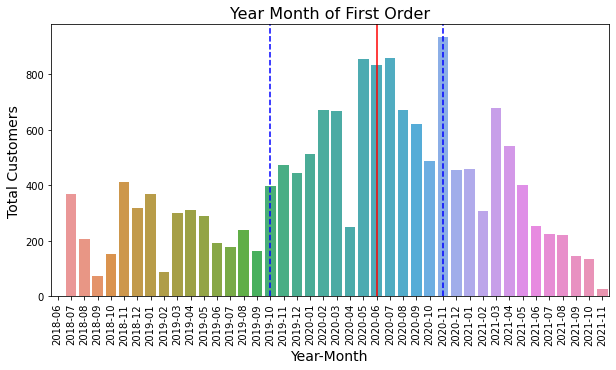

The median of our data is at index 24 and our IQR is between the two indexes: 16 and 29


In [24]:
customer['year_month_oldest'] = customer['First_Order'].dt.to_period('M')
series = customer.groupby('year_month_oldest')['First_Order'].count()
df = series.to_frame().reset_index().sort_values('year_month_oldest')
def get_3Q():
    counter = 0
    for i in range(len(df['First_Order'])):   
        counter += df['First_Order'][i]
        if counter >= 0.75 * df['First_Order'].sum(): 
            return(df['First_Order'].index[i])
            break
def get_1Q():
    counter = 0
    for i in range(len(df['First_Order'])):   
        counter += df['First_Order'][i]
        if counter >= df['First_Order'].sum()/4: 
            return(df['First_Order'].index[i])
            break
def get_median():
    counter = 0
    for i in range(len(df['First_Order'])):   
        counter += df['First_Order'][i]
        if counter > df['First_Order'].sum()/2: 
            return(df['First_Order'].index[i])
            break
            
plt.figure(figsize=(10,5))
chart = sns.countplot(x= 'year_month_oldest', data = customer.sort_values('year_month_oldest'))
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Total Customers', fontsize=14)
plt.title('Year Month of First Order', fontsize=16)
chart.set_xticklabels(chart.get_xticklabels(),rotation =90)
plt.axvline(get_median(), color ='r', label = 'Median')
plt.axvline(get_1Q(), color ='b', label = '1st Quartile',linestyle='--')
plt.axvline(get_3Q(), color ='b', label = '3rd Quartile',linestyle='--')
plt.show()
print('The median of our data is at index ' + str(get_median())+' and our IQR is between the two indexes: ' + str(get_1Q()) + ' and ' + str(get_3Q()))

As we can see from the visualization.
For context, less money was spent 

#### Visualizing the number of orders for repeat customers.

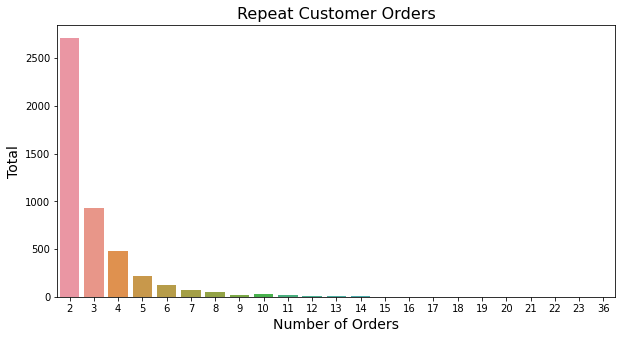

In [25]:
## Visualizing the repeat customers orders
_ = plt.figure(figsize=(10,5))
repeat_orders = customer[customer['Number_of_Orders'] > 1]
_ = sns.countplot(x= 'Number_of_Orders', data = repeat_orders)
_ = plt.xlabel('Number of Orders', fontsize=14)
_ = plt.ylabel('Total', fontsize=14)
_ = plt.title('Repeat Customer Orders', fontsize=16);
plt.show()

This tells us that

#### Visualizing the number of items purchased for repeat customers.

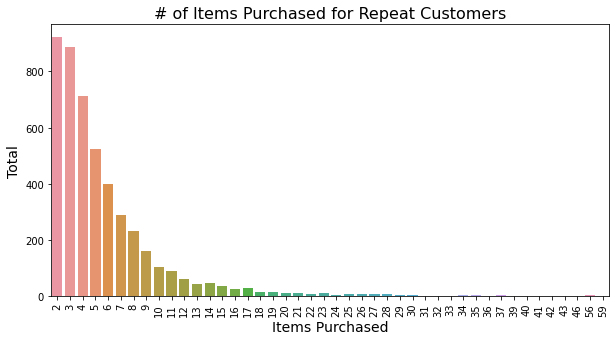

In [26]:
## Visualizing the number of items purchased for repeat customers. 
plt.figure(figsize=(10,5))
chart = sns.countplot(x= 'Total_Items_Purchased', data = repeat_orders)
_ = plt.xlabel('Items Purchased', fontsize=14)
_ = plt.ylabel('Total', fontsize=14)
_ = plt.title('# of Items Purchased for Repeat Customers', fontsize=16);
chart.set_xticklabels(chart.get_xticklabels(),rotation =90)

plt.show()

#### Visualizing the frequency of repeat customers. 

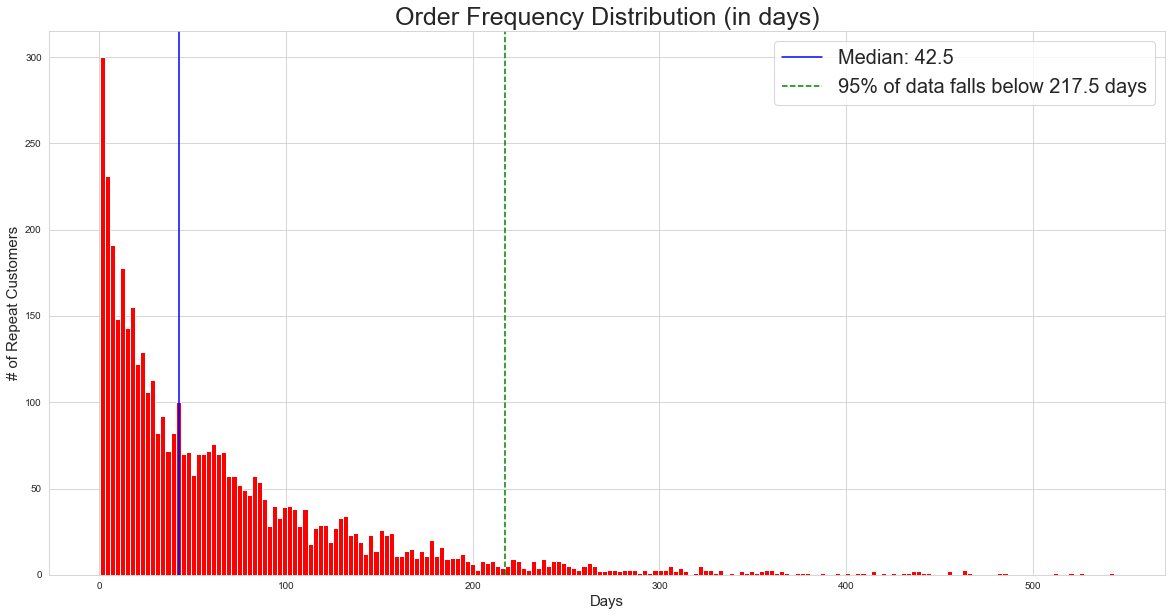

The average frequency of orders is ~ 67.0 days.
The median frequency of orders is ~  42.0 days.


In [27]:
sns.set_style("whitegrid")

frequency = customer[customer['Frequency_in_days'] >0]
mean = np.mean(frequency['Frequency_in_days'])
median = np.median(frequency['Frequency_in_days'])
upper_quartile = np.quantile(frequency['Frequency_in_days'],0.95)



ax = frequency['Frequency_in_days'].hist(bins = 200, figsize =(20,10), color ='r')
med_lab = 'Median: ' + str(median)
quant_lab = '95% of data falls below ' + str(upper_quartile) +' days'
plt.xlabel('Days', fontsize =15)
plt.ylabel('# of Repeat Customers', fontsize =15)
plt.title('Order Frequency Distribution (in days)', fontsize = 25)
plt.axvline(median, c='b', label = med_lab)
plt.axvline(upper_quartile, c='g', label = quant_lab, linestyle= '--')
plt.legend(fontsize =20)
plt.show()

print('The average frequency of orders is ~ ' + str(round(mean,0)) + ' days.')
print('The median frequency of orders is ~  ' + str(round(median,0)) + ' days.')

This tells us that...

## Items Visualizations 
- Now we move on to our item visualizations.

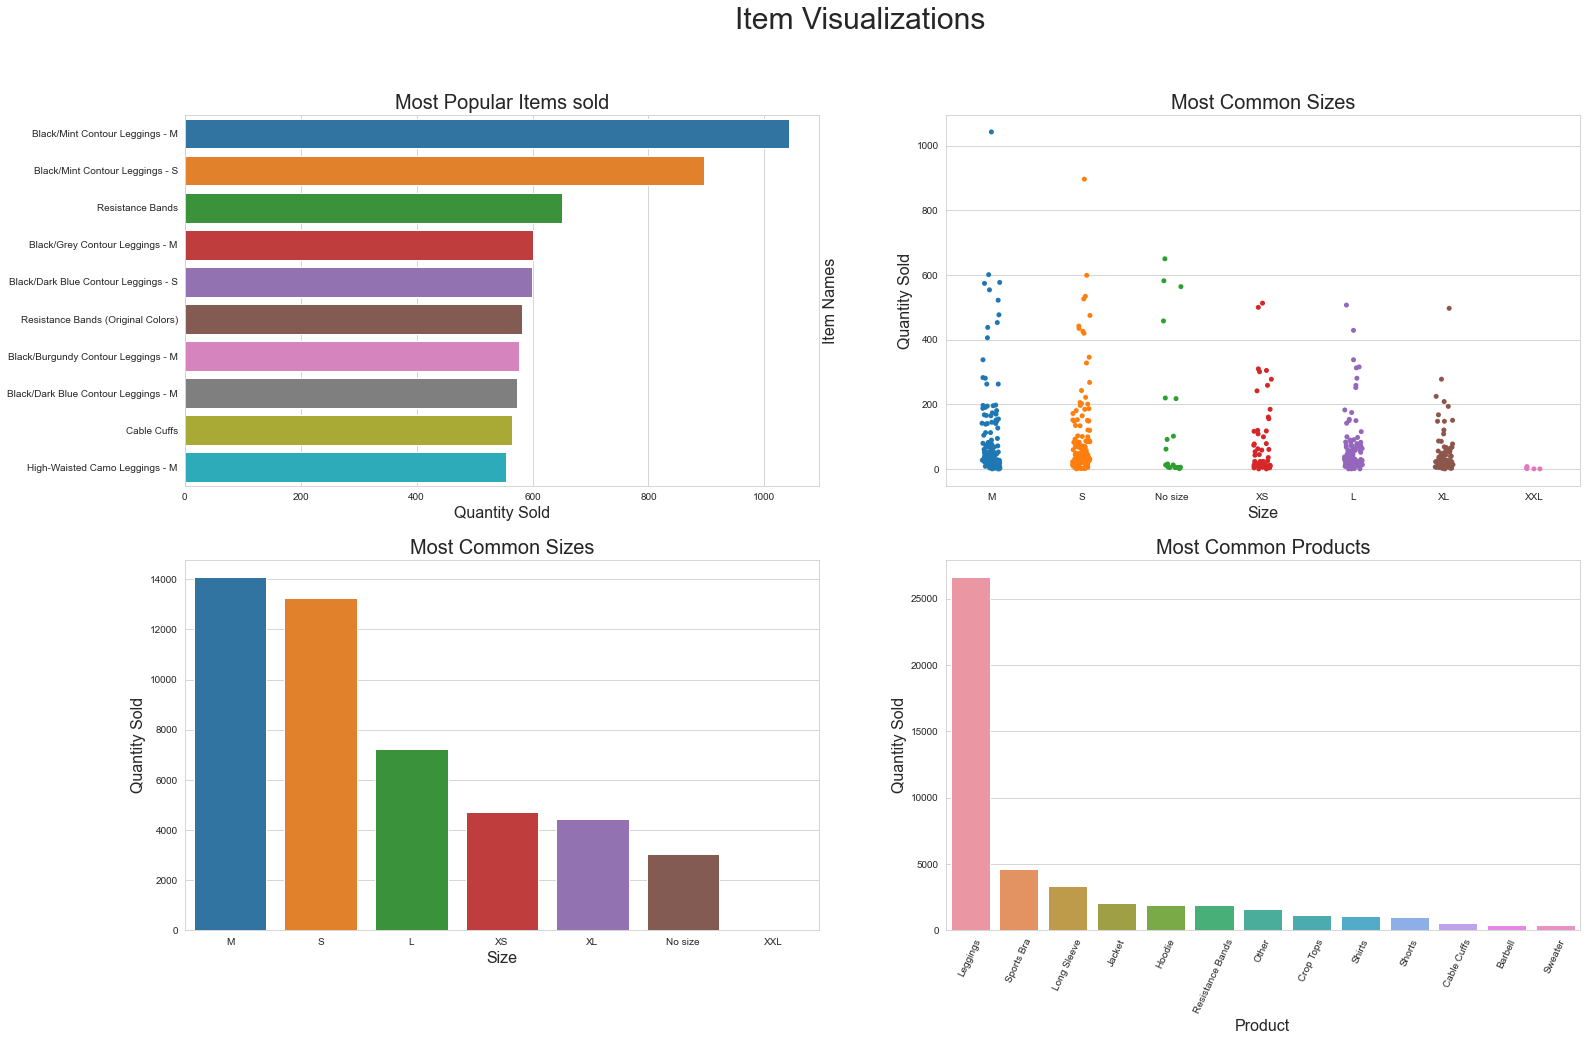

In [28]:
## We plot a couple of plots to get information about our items. 

fig, axes = plt.subplots(2,2, figsize=(25,15))
fig.suptitle('Item Visualizations', fontsize =30)

## 1) Barplot of Most Popular Items
sns.barplot(ax = axes[0,0], y= items['Lineitem name'][0:10], x='Times_Purchased', data = items)
axes[0,0].set_ylabel('Item Names', fontsize =16)
axes[0,0].yaxis.set_label_position('right')
axes[0,0].set_xlabel('Quantity Sold', fontsize =16)
axes[0,0].set_title('Most Popular Items sold', fontsize =20)

## 2) Barplot of Most Popular Items
sns.stripplot(ax =axes[0,1], x='size', y='Times_Purchased', data = items)
axes[0,1].set_ylabel('Quantity Sold', fontsize =16)
axes[0,1].set_xlabel('Size', fontsize =16)
axes[0,1].set_title('Most Common Sizes', fontsize =20)

## 3) Barplot of Most Popular Items
items_size = items.groupby(['size']).sum().reset_index().sort_values('Times_Purchased', ascending = False)
sns.barplot(ax =axes[1,0], x='size', y= 'Times_Purchased', data = items_size)
axes[1,0].set_ylabel('Quantity Sold', fontsize =16)
axes[1,0].set_xlabel('Size', fontsize =16)
axes[1,0].set_title('Most Common Sizes', fontsize =20)


## 4) Most Common Products
items_type = items.groupby(['type']).sum().reset_index().sort_values('Times_Purchased', ascending = False)
sns.barplot(ax =axes[1,1], x='type', y='Times_Purchased', data = items_type)
axes[1,1].set_ylabel('Quantity Sold', fontsize =16)
axes[1,1].set_xlabel('Product', fontsize =16)
axes[1,1].set_xticklabels(items_type['type'],fontsize =10, rotation =65)
axes[1,1].set_title('Most Common Products', fontsize =20)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
plt.show()

## EDA Findings Summary:
- Since the first order for customers is equally distributed, we can calculate a CLTV over 1 year. 
- The majority of items sold are leggings (more than all other products combined(
- Th

## Preparing the Data for CLTV Analysis. 

As a result from these visualizations, we are able to see that it is appropriate to use one year interval for our CLTV analysis. Let's create this. 

In [29]:
## We define our date_limit for the analyis. We will remove data before this date. 

date_limit = customer['Most_Recent_Order'].max() - timedelta(days=365)
print('The most recent date in our dataset is '+ str(customer['Most_Recent_Order'].max()))
print( 'Therefore, our date limit is: ' + str(date_limit))

## Creating a CLTV customers dataframe: 
customer_cltv = customer[customer['First_Order'] < date_limit]
print('Our previous customer data contained: ' + str(customer.CustomerID.count()) + ' records. Now we have ' + str(customer_cltv.CustomerID.count()))

The most recent date in our dataset is 2021-11-11 16:53:00
Therefore, our date limit is: 2020-11-11 16:53:00
Our previous customer data contained: 16180 records. Now we have 11722


In [30]:
## Now let's look at the raw_data_cltv where we have transactions that have been purchased at least a year ago. 
raw_data_cltv = raw_data [raw_data['Transaction Date'] < date_limit]
print('The total items purchased we had in the previous dataframe was ' +str(raw_data['Transaction Date'].count()))
print('Now we will have ' +str(raw_data_cltv['Transaction Date'].count()))
raw_data_cltv.head(2)

The total items purchased we had in the previous dataframe was 25188
Now we will have 17522


,OrderID,CustomerID,Financial Status,Transaction Date,Fulfillment Status,Accepts Marketing,Subtotal,Shipping,Taxes,Total,Discount Code,Discount Amount,Shipping Method,Lineitem quantity,Lineitem name,Lineitem price,Billing City,Billing Zip,Billing Province,Billing Country,Cancelled at,Payment Method,Refunded Amount,Lineitem discount
15823,#21644,Anonymous7172,paid,2020-11-11 16:06:00,fulfilled,no,161.5,0.00,11.70,173.2,BEN15,28.5,Free Shipping,1,Black/Dark Blue Contour Leggings - S,50.0,Mira loma,'91752,CA,US,NaN,Shopify Payments,0.0,0.0
15827,#21643,Anonymous4342,paid,2020-11-11 15:52:00,fulfilled,no,35.0,5.36,2.54,42.9,,0.0,Standard Shipping,1,Black Seamless Leggings - L,35.0,Perris,'92570,CA,US,NaN,Afterpay North America,0.0,0.0


## Creating an improved aggregate customer table: 
- We will be creating a new table with the new data which we decided to use. 

In [31]:
## 1) We create a transaction table. 
customer_stats_cltv = raw_data_cltv.groupby('CustomerID').agg(
            Smallest_Purchase = ('Subtotal', min),    
            Largest_Purchase = ('Subtotal', max),
            Total_Spent = ('Subtotal', sum),
            Average_order_spend = ('Subtotal', np.mean),
            Number_of_orders = ('Subtotal', 'nunique'),
            First_Order = ('Transaction Date', min),   
            Last_Order = ('Transaction Date', max),
            Time_Elapsed = ('Transaction Date', time_elapsed),
            Frequency_in_days =('Transaction Date', order_freq)).reset_index()


## We remove the first row which was a #REF! error and thus not a real customer. 
customer_stats_cltv = customer_stats_cltv.loc[1:]

## We add a repeat customers row. 
customer_stats_cltv['Repeat_Customer'] = np.where(customer_stats_cltv['Number_of_orders']>1,1,0)

# For each customer, we create a cltv_start date and a cltv end date. 
customer_stats_cltv['cltv_start'] = customer_stats_cltv['First_Order'] + timedelta(days=7)
customer_stats_cltv['cltv_end'] = customer_stats_cltv['First_Order'] + timedelta(days=365)

## Let's preview the first 5 rows. 
customer_stats_cltv.head(5)

,CustomerID,Smallest_Purchase,Largest_Purchase,Total_Spent,Average_order_spend,Number_of_orders,First_Order,Last_Order,Time_Elapsed,Frequency_in_days,Repeat_Customer,cltv_start,cltv_end
1,Anonymous1000,15.0,15.0,15.0,15.00,1,2018-11-26 11:05:00,2018-11-26 11:05:00,0,0.00,0,2018-12-03 11:05:00,2019-11-26 11:05:00
2,Anonymous10000,45.0,98.0,241.0,60.25,4,2018-12-04 06:47:00,2020-02-20 11:15:00,443,110.75,1,2018-12-11 06:47:00,2019-12-04 06:47:00
3,Anonymous10001,57.0,57.0,57.0,57.00,1,2019-06-22 22:40:00,2019-06-22 22:40:00,0,0.00,0,2019-06-29 22:40:00,2020-06-21 22:40:00
4,Anonymous10002,43.2,43.2,43.2,43.20,1,2019-11-30 09:42:00,2019-11-30 09:42:00,0,0.00,0,2019-12-07 09:42:00,2020-11-29 09:42:00
5,Anonymous10003,35.0,35.0,35.0,35.00,1,2020-11-03 08:19:00,2020-11-03 08:19:00,0,0.00,0,2020-11-10 08:19:00,2021-11-03 08:19:00


This table tells us a lot about our customers and aggregation. Now that we have created the 1 year cltv boundaries for our customers, we will merge this new dataframe back with our raw data so that we get the cltv of each customer. 

In [32]:
## We merge our data back with raw_data_cltv 
merged_data = raw_data_cltv.merge(customer_stats_cltv, left_on = 'CustomerID', right_on = 'CustomerID').sort_values('CustomerID')
merged_data.head(2)

,OrderID,CustomerID,Financial Status,Transaction Date,Fulfillment Status,Accepts Marketing,Subtotal,Shipping,Taxes,Total,Discount Code,Discount Amount,Shipping Method,Lineitem quantity,Lineitem name,Lineitem price,Billing City,Billing Zip,Billing Province,Billing Country,Cancelled at,Payment Method,Refunded Amount,Lineitem discount,Smallest_Purchase,Largest_Purchase,Total_Spent,Average_order_spend,Number_of_orders,First_Order,Last_Order,Time_Elapsed,Frequency_in_days,Repeat_Customer,cltv_start,cltv_end
16469,#2976,Anonymous1000,paid,2018-11-26 11:05:00,fulfilled,yes,15.0,3.18,0.0,18.18,,0.0,First Class Package,1,Barbell Pads,15.0,Findlay,'45840,OH,US,NaN,Shopify Payments,0.0,0.0,15.0,15.0,15.0,15.00,1,2018-11-26 11:05:00,2018-11-26 11:05:00,0,0.00,0,2018-12-03 11:05:00,2019-11-26 11:05:00
10863,#11708,Anonymous10000,paid,2020-02-20 11:15:00,fulfilled,yes,98.0,5.27,0.0,103.27,,0.0,First Class Package,1,Black/Mint Contour Leggings - XL,50.0,Tucson,'85757,AZ,US,NaN,Shopify Payments,0.0,0.0,45.0,98.0,241.0,60.25,4,2018-12-04 06:47:00,2020-02-20 11:15:00,443,110.75,1,2018-12-11 06:47:00,2019-12-04 06:47:00


In [33]:
## Let's create a dataframe with the columns that we most likely will need. Let's rename it CLTV data
cltv_data = merged_data[['OrderID','CustomerID','Transaction Date','Subtotal','Lineitem name','First_Order','Last_Order','cltv_start','cltv_end','Repeat_Customer']].sort_values('CustomerID')
cltv_data.head(5)

,OrderID,CustomerID,Transaction Date,Subtotal,Lineitem name,First_Order,Last_Order,cltv_start,cltv_end,Repeat_Customer
16469,#2976,Anonymous1000,2018-11-26 11:05:00,15.0,Barbell Pads,2018-11-26 11:05:00,2018-11-26 11:05:00,2018-12-03 11:05:00,2019-11-26 11:05:00,0
10863,#11708,Anonymous10000,2020-02-20 11:15:00,98.0,Black/Mint Contour Leggings - XL,2018-12-04 06:47:00,2020-02-20 11:15:00,2018-12-11 06:47:00,2019-12-04 06:47:00,1
10864,#9355,Anonymous10000,2019-11-30 08:53:00,48.0,High-Waisted Leggings Black - XL,2018-12-04 06:47:00,2020-02-20 11:15:00,2018-12-11 06:47:00,2019-12-04 06:47:00,1
10865,#9353,Anonymous10000,2019-11-30 08:24:00,50.0,Dark Purple/Opera Mauve Contour Leggings - XL ...,2018-12-04 06:47:00,2020-02-20 11:15:00,2018-12-11 06:47:00,2019-12-04 06:47:00,1
10866,#3044,Anonymous10000,2018-12-04 06:47:00,45.0,High-Waisted Leggings Grey - L,2018-12-04 06:47:00,2020-02-20 11:15:00,2018-12-11 06:47:00,2019-12-04 06:47:00,1


In [34]:
## Now we want to filter cltv_data so that all the items ordered are within our cltv dates. 
cltv_data  = cltv_data [(cltv_data ['Transaction Date'] >= cltv_data ['First_Order']) & (cltv_data ['Transaction Date'] <= cltv_data ['cltv_end'])]

Let's compare the merge data and cltv dataframes. Looking below, it looks like our simp dataframe correctly filtered, and we can now create the CLTV table. 

In [35]:
merged_data.query("CustomerID == 'Anonymous10000'")

,OrderID,CustomerID,Financial Status,Transaction Date,Fulfillment Status,Accepts Marketing,Subtotal,Shipping,Taxes,Total,Discount Code,Discount Amount,Shipping Method,Lineitem quantity,Lineitem name,Lineitem price,Billing City,Billing Zip,Billing Province,Billing Country,Cancelled at,Payment Method,Refunded Amount,Lineitem discount,Smallest_Purchase,Largest_Purchase,Total_Spent,Average_order_spend,Number_of_orders,First_Order,Last_Order,Time_Elapsed,Frequency_in_days,Repeat_Customer,cltv_start,cltv_end
10863,#11708,Anonymous10000,paid,2020-02-20 11:15:00,fulfilled,yes,98.0,5.27,0.0,103.27,,0.0,First Class Package,1,Black/Mint Contour Leggings - XL,50.0,Tucson,'85757,AZ,US,NaN,Shopify Payments,0.0,0.0,45.0,98.0,241.0,60.25,4,2018-12-04 06:47:00,2020-02-20 11:15:00,443,110.75,1,2018-12-11 06:47:00,2019-12-04 06:47:00
10864,#9355,Anonymous10000,paid,2019-11-30 08:53:00,fulfilled,yes,48.0,3.28,0.0,51.28,,0.0,First Class Package,1,High-Waisted Leggings Black - XL,48.0,Tucson,'85757,AZ,US,NaN,Shopify Payments,0.0,0.0,45.0,98.0,241.0,60.25,4,2018-12-04 06:47:00,2020-02-20 11:15:00,443,110.75,1,2018-12-11 06:47:00,2019-12-04 06:47:00
10865,#9353,Anonymous10000,paid,2019-11-30 08:24:00,fulfilled,yes,50.0,3.28,0.0,53.28,,0.0,First Class Package,1,Dark Purple/Opera Mauve Contour Leggings - XL ...,50.0,Tucson,'85757,AZ,US,NaN,Shopify Payments,0.0,0.0,45.0,98.0,241.0,60.25,4,2018-12-04 06:47:00,2020-02-20 11:15:00,443,110.75,1,2018-12-11 06:47:00,2019-12-04 06:47:00
10866,#3044,Anonymous10000,paid,2018-12-04 06:47:00,fulfilled,yes,45.0,3.66,0.0,48.66,,0.0,First Class Package,1,High-Waisted Leggings Grey - L,45.0,Tucson,'85757,AZ,US,NaN,Shopify Payments,0.0,0.0,45.0,98.0,241.0,60.25,4,2018-12-04 06:47:00,2020-02-20 11:15:00,443,110.75,1,2018-12-11 06:47:00,2019-12-04 06:47:00


In [36]:
cltv_data.query("CustomerID == 'Anonymous10000'")

,OrderID,CustomerID,Transaction Date,Subtotal,Lineitem name,First_Order,Last_Order,cltv_start,cltv_end,Repeat_Customer
10864,#9355,Anonymous10000,2019-11-30 08:53:00,48.0,High-Waisted Leggings Black - XL,2018-12-04 06:47:00,2020-02-20 11:15:00,2018-12-11 06:47:00,2019-12-04 06:47:00,1
10865,#9353,Anonymous10000,2019-11-30 08:24:00,50.0,Dark Purple/Opera Mauve Contour Leggings - XL ...,2018-12-04 06:47:00,2020-02-20 11:15:00,2018-12-11 06:47:00,2019-12-04 06:47:00,1
10866,#3044,Anonymous10000,2018-12-04 06:47:00,45.0,High-Waisted Leggings Grey - L,2018-12-04 06:47:00,2020-02-20 11:15:00,2018-12-11 06:47:00,2019-12-04 06:47:00,1


It looks like this worked. Now we want to create one last dataframe where we will be working 

In [37]:
cltv_data.head()

,OrderID,CustomerID,Transaction Date,Subtotal,Lineitem name,First_Order,Last_Order,cltv_start,cltv_end,Repeat_Customer
16469,#2976,Anonymous1000,2018-11-26 11:05:00,15.0,Barbell Pads,2018-11-26 11:05:00,2018-11-26 11:05:00,2018-12-03 11:05:00,2019-11-26 11:05:00,0
10864,#9355,Anonymous10000,2019-11-30 08:53:00,48.0,High-Waisted Leggings Black - XL,2018-12-04 06:47:00,2020-02-20 11:15:00,2018-12-11 06:47:00,2019-12-04 06:47:00,1
10865,#9353,Anonymous10000,2019-11-30 08:24:00,50.0,Dark Purple/Opera Mauve Contour Leggings - XL ...,2018-12-04 06:47:00,2020-02-20 11:15:00,2018-12-11 06:47:00,2019-12-04 06:47:00,1
10866,#3044,Anonymous10000,2018-12-04 06:47:00,45.0,High-Waisted Leggings Grey - L,2018-12-04 06:47:00,2020-02-20 11:15:00,2018-12-11 06:47:00,2019-12-04 06:47:00,1
14411,#6130,Anonymous10001,2019-06-22 22:40:00,57.0,Resistance Bands (New Colors),2019-06-22 22:40:00,2019-06-22 22:40:00,2019-06-29 22:40:00,2020-06-21 22:40:00,0


In [38]:
customer_cltv = cltv_data.groupby('CustomerID').agg(
            CLTV_Total_Spent = ('Subtotal', sum),
            Smallest_Purchase = ('Subtotal', min),    
            Largest_Purchase = ('Subtotal', max),
            Average_order_spend = ('Subtotal', np.mean),
            Number_of_orders = ('Subtotal', 'nunique'),
            First_Order = ('Transaction Date', min),   
            Last_Order = ('Transaction Date', max),
            Time_Elapsed = ('Transaction Date', time_elapsed),
            Frequency_in_days =('Transaction Date', order_freq),
            cltv_start =('cltv_start', max),
            cltv_end =('cltv_end', max),
            repeat_customer =('Repeat_Customer', max)).reset_index()

customer_cltv.head(50)

,CustomerID,CLTV_Total_Spent,Smallest_Purchase,Largest_Purchase,Average_order_spend,Number_of_orders,First_Order,Last_Order,Time_Elapsed,Frequency_in_days,cltv_start,cltv_end,repeat_customer
0,Anonymous1000,15.0,15.0,15.0,15.000000,1,2018-11-26 11:05:00,2018-11-26 11:05:00,0,0.000000,2018-12-03 11:05:00,2019-11-26 11:05:00,0
1,Anonymous10000,143.0,45.0,50.0,47.666667,3,2018-12-04 06:47:00,2019-11-30 08:53:00,361,120.333333,2018-12-11 06:47:00,2019-12-04 06:47:00,1
2,Anonymous10001,57.0,57.0,57.0,57.000000,1,2019-06-22 22:40:00,2019-06-22 22:40:00,0,0.000000,2019-06-29 22:40:00,2020-06-21 22:40:00,0
3,Anonymous10002,43.2,43.2,43.2,43.200000,1,2019-11-30 09:42:00,2019-11-30 09:42:00,0,0.000000,2019-12-07 09:42:00,2020-11-29 09:42:00,0
4,Anonymous10003,35.0,35.0,35.0,35.000000,1,2020-11-03 08:19:00,2020-11-03 08:19:00,0,0.000000,2020-11-10 08:19:00,2021-11-03 08:19:00,0
5,Anonymous10004,35.0,35.0,35.0,35.000000,1,2020-11-03 08:15:00,2020-11-03 08:15:00,0,0.000000,2020-11-10 08:15:00,2021-11-03 08:15:00,0
6,Anonymous10007,25.0,25.0,25.0,25.000000,1,2020-03-10 20:23:00,2020-03-10 20:23:00,0,0.000000,2020-03-17 20:23:00,2021-03-10 20:23:00,0
7,Anonymous10008,334.0,334.0,334.0,334.000000,1,2020-11-11 13:15:00,2020-11-11 13:15:00,0,0.000000,2020-11-18 13:15:00,2021-11-11 13:15:00,0
8,Anonymous10009,48.0,48.0,48.0,48.000000,1,2019-09-09 17:47:00,2019-09-09 17:47:00,0,0.000000,2019-09-16 17:47:00,2020-09-08 17:47:00,0
9,Anonymous1001,85.0,85.0,85.0,85.000000,1,2020-08-27 16:43:00,2020-08-27 16:43:00,0,0.000000,2020-09-03 16:43:00,2021-08-27 16:43:00,0


In [39]:
CLTV_avg = customer_cltv.CLTV_Total_Spent.mean()
print('The one year CLTV of customers is: $' + str(round(CLTV_avg,2)))

The one year CLTV of customers is: $93.57


In [40]:
cltv_data_one_week  = cltv_data[(cltv_data ['Transaction Date'] > cltv_data ['First_Order']) & (cltv_data ['Transaction Date'] <= cltv_data ['cltv_start'])]
cltv_data.query("CustomerID == 'Anonymous10000'")
cltv_data_one_week.count()

OrderID             764
CustomerID          764
Transaction Date    764
Subtotal            764
Lineitem name       764
First_Order         764
Last_Order          764
cltv_start          764
cltv_end            764
Repeat_Customer     764
dtype: int64

## Experiments

In [41]:
# we want to predict, for a given customer, the (total spent) / (x months)
# we need to pick the time period of interest "x months"
# that choice needs to be influenced by the data we are working with
# For example, based on:
#  - the average time between 2 purchases
#  - the average duration of the relationship (last order date - first order date)

# OOP & Additional Functionalities

In [42]:

## We then create a column which will give the product sku and frequency purchased.

# We start by defining our function to parse the customer purchases. 

def parse_customer_purchases(row):
    """
    1. For the customer in this row in the customer dataframe, 
       go fetch all their purchases in the raw_data dataframe.
    2. Populate a dictionary that stores all the unique product skus corresponding to these purchases.
       The value for each sku is the number of times the item was purchased.
    """
    # Step 1: For this customer, find all their purchases
    customer_email = row['CustomerID']
    items_purchased = raw_data.loc[raw_data['CustomerID'] == customer_email]['Lineitem name']

    # Step 2: Create the empty dictionary
    # (key = product sku, value = number of times bought)
    dict_items_purchased = {}
    for item in items_purchased:
        # Step 2: For each item in the items_purchased, find its unique sku
        item_sku = items.loc[items['Lineitem name'] == item]['Product Sku'].values[0]
        # Step 2: If we have never seen that sku before, store it as a new entry in the dictionary.
        #         Give it a value of 1 as it's only showed up once in the items_purchased.
        if item_sku not in dict_items_purchased.keys():
            dict_items_purchased[item_sku] = 1
        # Step 2: If we have seen that sku before, it is in the dictionary keys and we add 1
        #         to the value, meaning that it's been purchased one more time. When we exit the
        #         loop, this will give us the total number of times the customer purchased that item.
        else:
            dict_items_purchased[item_sku] += 1

    return dict_items_purchased

# Using the apply method, we create a new column.
customer['Products_Purchased'] = customer.apply(parse_customer_purchases, axis=1)
customer.head(10)


,CustomerID,Number_of_Orders,Total_Items_Purchased,Total_Spent,Smallest_purchase,Largest_purchase,Average_order_spend,Coupons_Used,First_Order,Most_Recent_Order,Time_Elapsed_days,Frequency_in_days,repeat_customer2,repeat_customer,year_month_oldest,Products_Purchased
0,Anonymous13455,36,42,1480.60,12.5,122.40,41.127778,14,2020-06-30 17:54:00,2021-10-15 16:10:00,471.0,13.083333,1,1,2020-06,"{365: 1, 351: 1, 158: 1, 183: 1, 139: 2, 187: ..."
1,Anonymous2142,23,37,1244.90,0.0,126.00,54.126087,11,2019-05-09 15:48:00,2021-08-10 09:57:00,823.0,39.190476,1,1,2019-05,"{382: 1, 64: 1, 180: 2, 250: 1, 90: 3, 307: 1,..."
2,Anonymous4843,22,56,2259.05,48.0,156.75,102.684091,3,2019-10-14 22:08:00,2021-10-15 16:59:00,731.0,36.550000,1,1,2019-10,"{91: 1, 18: 1, 304: 1, 342: 1, 389: 1, 236: 2,..."
3,Anonymous11225,21,27,1022.85,16.0,140.00,48.707143,5,2020-01-31 17:54:00,2021-05-25 13:46:00,479.0,23.950000,1,1,2020-01,"{25: 1, 155: 1, 274: 1, 163: 1, 81: 1, 87: 1, ..."
4,Anonymous540,20,43,1534.10,22.0,176.00,76.705000,15,2020-01-03 16:21:00,2021-08-09 09:02:00,583.0,30.684211,1,1,2020-01,"{394: 1, 351: 1, 365: 1, 158: 1, 169: 1, 100: ..."
5,Anonymous11560,19,35,1363.60,16.0,188.00,71.768421,8,2018-11-12 22:14:00,2021-09-24 23:33:00,1047.0,58.166667,1,1,2018-11,"{506: 1, 548: 1, 534: 1, 530: 1, 471: 1, 468: ..."
6,Anonymous8181,19,28,1168.00,35.0,96.00,61.473684,0,2020-05-27 02:09:00,2021-08-09 09:52:00,439.0,23.105263,1,1,2020-05,"{471: 1, 250: 1, 180: 1, 64: 1, 55: 1, 96: 1, ..."
7,Anonymous6363,18,56,2051.70,45.0,273.00,113.983333,5,2018-07-04 18:44:00,2021-10-12 10:20:00,1195.0,74.687500,1,1,2018-07,"{212: 1, 416: 1, 270: 1, 243: 1, 169: 1, 115: ..."
8,Anonymous14618,18,32,1209.00,21.0,200.00,67.166667,1,2020-06-22 15:41:00,2021-08-09 16:24:00,413.0,22.944444,1,1,2020-06,"{441: 1, 365: 1, 541: 1, 389: 1, 158: 1, 169: ..."
9,Anonymous7500,17,46,1652.55,42.5,268.00,97.208824,10,2020-02-22 17:36:00,2021-09-21 11:53:00,576.0,33.882353,1,1,2020-02,"{381: 1, 416: 1, 453: 1, 469: 1, 449: 1, 436: ..."


In [43]:
class ItemInventory():
    """
    This class stores the specific information about the products sold by the shop in a dataframe.
    
    
    members:
        - inventory is a dataframe where each row is an individual item sold,
          and the columns are the features of the item.
          The first column is "item_id", which gives a unique identifier for the product.
    """
    def __init__(self, features, products, prices):
        """
        input:
            - features is a list of strings, corresponding to the desired features for the
              products (eg size, color, name etc.). It is possible that not every product sold
              has every feature (for example a sports equipment shop may sell clothing that will
              have a size feature, but also resistance bands that don't, etc.)
            - products is a list of strings, corresponding to the unique entries of the 'Lineitem name'
              column in the original dataset
            - prices is a list of strings, corresponding to the unique entries of the 'Lineitem price'
              column in the original dataset
        """
        self.inventory = pd.DataFrame()
        # TODO: Fill with index of the size of the unique count of entries in products
        self.inventory.add_column("item_id")
        # TODO: Aggregate the number of times every single product was purchased (i.e., how many
        #       times it is repeated in the products list)
        self.inventory.add_column("count")
        # TODO: Retreive corresponding price for each individual item
        self.inventory.add_column("price")
        for feature in features:
            self.inventory.add_column(feature)

        self.extract_features(products)
        
    def extract_features(self, products):
        """
        Each string in products contains the desired features we need to extract for each product,
        but they are ordered and separated in arbitrary ways across shops.
        """
        # TODO: Parse the strings in products to extract the relevant features and fill the other
        #       columns of self.inventory
            
    def find_item(self, item_id):
        return self.inventory.row(item_id)